In [81]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk 
import string

In [82]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [83]:
print(train.info())
print(train.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      31962 non-null  int64 
 1   label   31962 non-null  int64 
 2   tweet   31962 non-null  object
dtypes: int64(2), object(1)
memory usage: 749.2+ KB
None
   id  label                                              tweet
0   1      0   @user when a father is dysfunctional and is s...
1   2      0  @user @user thanks for #lyft credit i can't us...
2   3      0                                bihday your majesty
3   4      0  #model   i love u take with u all the time in ...
4   5      0             factsguide: society now    #motivation


In [84]:
print('positive_tweets count :',train[train.label==1].size)
print('negetive tweets count :',train[train.label==0].size)
print('positive_tweets example :\n',train[train.label==1].reset_index().tweet[3])
print('negetive tweets example :\n',train[train.label==0].reset_index().tweet[0])

positive_tweets count : 6726
negetive tweets count : 89160
positive_tweets example :
 @user @user lumpy says i am a . prove it lumpy.
negetive tweets example :
  @user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction.   #run


In [85]:
#hmmmmm in the above dataset we have a lot more negetive tweets than positive,we could work with this dataset by taking same number of negetive tweets instaed of taking all
#lets try nltk dataset

#The sample dataset from NLTK is separated into positive and negative tweets. 
#It contains 5000 positive tweets and 5000 negative tweets exactly. 
#The exact match between these classes is not a coincidence. 
#The intention is to have a balanced dataset. 
#That does not reflect the real distributions of positive and negative classes in live Twitter streams. 
#It is just because balanced datasets simplify the design of most computational methods that are required for sentiment analysis. 
#However, it is better to be aware that this balance of classes is artificial.




nltk.download('twitter_samples')

[nltk_data] Downloading package twitter_samples to
[nltk_data]     /home/shaffat/nltk_data...
[nltk_data]   Package twitter_samples is already up-to-date!


True

In [86]:
from nltk.corpus import twitter_samples
positve_tweets =  twitter_samples.strings('positive_tweets.json')
negative_tweets = twitter_samples.strings('negative_tweets.json')

In [87]:
print('positive_tweets count : ',len(positve_tweets))
print('negative tweets count : ',len(negative_tweets))
print('positive example :\n',positve_tweets[0])
print('negative example :\n',negative_tweets[0])

positive_tweets count :  5000
negative tweets count :  5000
positive example :
 #FollowFriday @France_Inte @PKuchly57 @Milipol_Paris for being top engaged members in my community this week :)
negative example :
 hopeless for tmr :(


<p>Data preprocessing is one of the critical steps in any machine learning project. It includes cleaning and formatting the data before feeding into a machine learning algorithm. For NLP, the preprocessing steps are comprised of the following tasks:
</p>
<ul>
<li>Tokenizing the string</li>
<li>Lowercasing</li>
<li>Removing stop words and punctuation</li>
<li>Stemming</li>
</ul>


In [88]:
import regex as re

In [89]:
def remove_hyperlink_retweet(twt):
    #remove old style retweet text 'RT'
    # remove old style retweet text "RT"
    twt = re.sub(r'^RT[\s]+', '', twt)

    # remove hyperlinks
    twt = re.sub(r'https?:\/\/.*[\r\n]*', '', twt)

    # remove hashtags
    # only removing the hash # sign from the word
    twt = re.sub(r'#', '', twt)
    
    return twt
    

In [90]:
print(positve_tweets[5])
print(remove_hyperlink_retweet(positve_tweets[5]))


@BhaktisBanter @PallaviRuhail This one is irresistible :)
#FlipkartFashionFriday http://t.co/EbZ0L2VENM
@BhaktisBanter @PallaviRuhail This one is irresistible :)
FlipkartFashionFriday 


In [91]:
from nltk.tokenize import TweetTokenizer
tokenizer = TweetTokenizer(preserve_case=False)
tweet_tokenize = tokenizer.tokenize(negative_tweets[0])
print(tweet_tokenize)

['hopeless', 'for', 'tmr', ':(']


In [92]:
#remove stopwords and puncuations
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/shaffat/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [93]:
from nltk.corpus import stopwords

In [94]:
stopwords_eng  = stopwords.words('english')

In [95]:
print(stopwords_eng)


['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [96]:
def remove_stop_words(s):
    new_s = []
    for w in s:
        if w not in stopwords_eng:
            #check for puntuations but keep the emojis
            if len(w)==1:
                if w not in string.punctuation:
                    new_s.append(w)
            else:
                
                new_s.append(w)
    
    return new_s
    

In [97]:
print(negative_tweets[1])
print(remove_stop_words(tokenizer.tokenize(negative_tweets[1])))

Everything in the kids section of IKEA is so cute. Shame I'm nearly 19 in 2 months :(
['everything', 'kids', 'section', 'ikea', 'cute', 'shame', "i'm", 'nearly', '19', '2', 'months', ':(']


In [98]:
#stem the words
from nltk.stem import PorterStemmer

def stemming(s):
    new_s = []
    stemmer = PorterStemmer()
    for w in s:
        new_s.append(stemmer.stem(w))
    return new_s


In [99]:
#lets put everything together now
def process_the_tweets(sentences):
    tokenizer = TweetTokenizer(preserve_case=False)
    result  = []
    for sentence in sentences:
        clean = remove_hyperlink_retweet(sentence)
        tokens = tokenizer.tokenize(sentence)
        stop_words_removed = remove_stop_words(tokens)
        stemmed = stemming(stop_words_removed)
        result.append(stemmed)
    return result

In [100]:
process_the_tweets(negative_tweets)

[['hopeless', 'tmr', ':('],
 ['everyth',
  'kid',
  'section',
  'ikea',
  'cute',
  'shame',
  "i'm",
  'nearli',
  '19',
  '2',
  'month',
  ':('],
 ['@hegelbon', 'heart', 'slide', 'wast', 'basket', ':('],
 ['“', '@ketchburn', 'hate', 'japanes', 'call', 'bani', ':(', ':(', '”'],
 ['dang', 'start', 'next', 'week', 'work', ':('],
 ['oh', 'god', 'babi', 'face', ':(', 'https://t.co/9fcwgvaki0'],
 ['@rileymcdonough', 'make', 'smile', ':('],
 ['@f0ggstar',
  '@stuartthul',
  'work',
  'neighbour',
  'motor',
  'ask',
  'said',
  'hate',
  'updat',
  'search',
  ':(',
  'http://t.co/xvmtuikwln'],
 [':(', '@tahuodyy', 'sialan', ':(', 'https://t.co/hv1i0xcrl2'],
 ['athabasca',
  'glacier',
  '#1948',
  ':-(',
  '#athabasca',
  '#glacier',
  '#jasper',
  '#jaspernationalpark',
  '#alberta',
  '#explorealberta',
  '…',
  'http://t.co/dzzdqmf7cz'],
 ['realli', 'good', 'g', 'idea', "i'm", 'never', 'go', 'meet', ':('],
 ['@rampageinthebox', 'mare', 'ivan', ':('],
 ['@sophiamascardo', 'happi', 'tri

In [101]:
#now we will build a frequency dict which tells us how many time a word appears in a positive
#and how many times in negetive

def build_freq(processed_tweets, val):
    '''
    returns a dict whose key is a tuple ('stemmed word',sentiment)
    '''
    freq={}
    for tweet in processed_tweets:
        for stem_word in tweet:
            pair = (stem_word,val)
            freq[pair]=freq.get(pair,0)+1
    return freq

In [102]:
word_freq={}
word_freq.update(build_freq(process_the_tweets(positve_tweets[:4000]),1))
word_freq.update(build_freq(process_the_tweets(negative_tweets[:4000]),0))


In [103]:
print(word_freq)

{('#followfriday', 1): 23, ('@france_int', 1): 1, ('@pkuchly57', 1): 1, ('@milipol_pari', 1): 1, ('top', 1): 30, ('engag', 1): 7, ('member', 1): 14, ('commun', 1): 26, ('week', 1): 72, (':)', 1): 2960, ('@lamb2ja', 1): 1, ('hey', 1): 60, ('jame', 1): 7, ('odd', 1): 2, (':/', 1): 5, ('pleas', 1): 81, ('call', 1): 27, ('contact', 1): 4, ('centr', 1): 1, ('02392441234', 1): 1, ('abl', 1): 6, ('assist', 1): 1, ('mani', 1): 28, ('thank', 1): 522, ('@despiteoffici', 1): 1, ('listen', 1): 15, ('last', 1): 39, ('night', 1): 55, ('bleed', 1): 2, ('amaz', 1): 41, ('track', 1): 5, ('scotland', 1): 2, ('@97side', 1): 1, ('congrat', 1): 15, ('yeaaaah', 1): 1, ('yippppi', 1): 1, ('accnt', 1): 2, ('verifi', 1): 2, ('rqst', 1): 1, ('succeed', 1): 1, ('got', 1): 57, ('blue', 1): 8, ('tick', 1): 1, ('mark', 1): 1, ('fb', 1): 4, ('profil', 1): 2, ('15', 1): 3, ('day', 1): 186, ('@bhaktisbant', 1): 16, ('@pallaviruhail', 1): 8, ('one', 1): 92, ('irresist', 1): 2, ('#flipkartfashionfriday', 1): 16, ('http:

In [104]:
def word_count(words):
    '''
    return a list of tuples
    each tuple represents its appearce in positive and negetive tweets
    (word,pos_count,neg_count)
    '''
    lst = []
    for w in words:
        tple = (w,word_freq.get((w,1),0),word_freq.get((w,0),0))
        lst.append(tple)
    return lst

In [105]:
keys = ['happi', 'merri', 'nice', 'good', 'bad', 'sad', 'mad', 'best', 'pretti',
        '❤', ':)', ':(', '😒', '😬', '😄', '😍', '♛',
        'song', 'idea', 'power', 'play', 'magnific']
data= word_count(keys)
print(data)

[('happi', 157, 18), ('merri', 1, 0), ('nice', 71, 17), ('good', 191, 83), ('bad', 14, 50), ('sad', 5, 98), ('mad', 1, 8), ('best', 49, 16), ('pretti', 16, 12), ('❤', 21, 15), (':)', 2960, 2), (':(', 1, 3676), ('😒', 2, 3), ('😬', 0, 2), ('😄', 3, 1), ('😍', 1, 0), ('♛', 0, 210), ('song', 15, 25), ('idea', 24, 8), ('power', 6, 5), ('play', 37, 39), ('magnific', 0, 0)]


/home/shaffat/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 128556 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/shaffat/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 128556 missing from current font.
  font.set_text(s, 0, flags=flags)


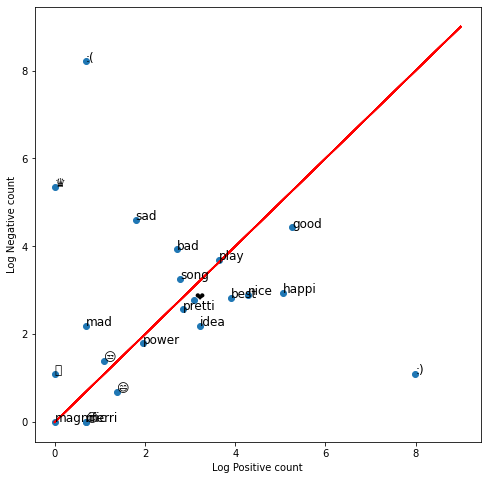

In [106]:
fig, ax = plt.subplots(figsize = (8,8))

# convert positive raw counts to logarithmic scale. we add 1 to avoid log(0)
x = np.log([x[1] + 1 for x in data])  

# do the same for the negative counts
y = np.log([x[2] + 1 for x in data]) 

# Plot a dot for each pair of words
ax.scatter(x, y)  
# assign axis labels
plt.xlabel("Log Positive count")
plt.ylabel("Log Negative count")

# Add the word as the label at the same position as you added the points just before
for i in range(0, len(data)):
    ax.annotate(data[i][0], (x[i], y[i]), fontsize=12)

    ax.plot([0, 9], [0, 9], color = 'red') # Plot the red line that divides the 2 areas.
plt.show()

In [107]:
all_tweet = positve_tweets+negative_tweets

train =[]
train = process_the_tweets(positve_tweets[:4000]) +process_the_tweets(negative_tweets[:4000])

y_train = [1 for x in range(4000) ] + [0 for x in range(4000)]



test = []
test = process_the_tweets(positve_tweets[4000:])+process_the_tweets(negative_tweets[4000:])
y_test = [1 for x in range(1000) ] + [0 for x in range(1000)]


print(len(train))
print(len(test))
print(len(all_tweet))
print(len(y_train))
print(len(y_test))
print(train[0])
print(train[4000])


8000
2000
10000
8000
2000
['#followfriday', '@france_int', '@pkuchly57', '@milipol_pari', 'top', 'engag', 'member', 'commun', 'week', ':)']
['hopeless', 'tmr', ':(']


In [108]:
#feature extraction
total = lambda sentence,x:sum(word_freq.get((word,x),0) for word in sentence)

for word in train[0]:
    print(word_freq.get((word,1),0),' ',word_freq.get((word,0),0),' ',word)
    
print(total(train[0],1))
print(total(train[0],0))

train_positive_point = [ total(sentence,1) for sentence in train]
train_negetive_point = [ total(sentence,0) for sentence in train]

test_positive_point = [ total(sentence,1) for sentence in test]
test_negetive_point = [ total(sentence,0) for sentence in test]


23   0   #followfriday
1   0   @france_int
1   0   @pkuchly57
1   0   @milipol_pari
30   5   top
7   0   engag
14   6   member
26   1   commun
72   47   week
2960   2   :)
3135
61


In [109]:
X_train = pd.DataFrame(data={'pos':train_positive_point, 'neg':train_negetive_point})
X_test = pd.DataFrame(data={'pos':test_positive_point, 'neg':test_negetive_point})

In [110]:
X_train.head(20)

,pos,neg
0,3135,61
1,3706,444
2,3120,116
3,2976,4
4,3230,223
5,3095,120
6,4038,533
7,3281,278
8,655,189
9,265,114


In [111]:
X_test.head(20)

,pos,neg
0,3396,414
1,3410,397
2,1393,329
3,3280,401
4,791,27
5,3392,283
6,551,19
7,1143,430
8,1380,578
9,3199,29


In [112]:
from sklearn.linear_model import LogisticRegression

In [113]:
lr  = LogisticRegression(verbose=True, max_iter=1000)

In [114]:
lr.fit(X_train,y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s finished


LogisticRegression(max_iter=1000, verbose=True)

In [115]:
y_pred = lr.predict(X_test)

In [116]:
from sklearn.metrics import accuracy_score

In [117]:
print(accuracy_score(y_pred,y_test))

0.994
